In [1]:
library(tidyverse)    # For ggplot, dplyr, and friends
library(countrycode)  # For dealing with country names, abbreviations, and codes
library(lubridate)    # For dealing with dates

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.3       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
Warning message:
"package 'ggplot2' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [2]:
refugees_raw <- read_csv("C:/Users/wf8az/Downloads/refugee_status.csv", na = c("-", "X", "D")) 


Parsed with column specification:
cols(
  `Continent/Country of Nationality` = col_character(),
  `2006` = col_number(),
  `2007` = col_number(),
  `2008` = col_number(),
  `2009` = col_number(),
  `2010` = col_number(),
  `2011` = col_number(),
  `2012` = col_number(),
  `2013` = col_number(),
  `2014` = col_number(),
  `2015` = col_number()
)


In [3]:
non_countries <- c("Africa", "Asia", "Europe", "North America", "Oceania", 
                   "South America", "Unknown", "Other", "Total")

In [4]:
refugees_clean <- refugees_raw %>%
  # Make this column name easier to work with
  rename(origin_country = `Continent/Country of Nationality`) %>%
  # Get rid of non-countries
  filter(!(origin_country %in% non_countries)) %>%
  # Convert country names to ISO3 codes
  mutate(iso3 = countrycode(origin_country, "country.name", "iso3c",
                            custom_match = c("Korea, North" = "PRK"))) %>%
  # Convert ISO3 codes to country names, regions, and continents
  mutate(origin_country = countrycode(iso3, "iso3c", "country.name"),
         origin_region = countrycode(iso3, "iso3c", "region"),
         origin_continent = countrycode(iso3, "iso3c", "continent")) %>%
  # Make this data tidy
  gather(year, number, -origin_country, -iso3, -origin_region, -origin_continent) %>%
  # Make sure the year column is numeric + make an actual date column for years
  mutate(year = as.numeric(year),
         year_date = ymd(paste0(year, "-01-01")))

In [5]:
head(refugees_clean)

origin_country,iso3,origin_region,origin_continent,year,number,year_date
Afghanistan,AFG,South Asia,Asia,2006,651,2006-01-01
Angola,AGO,Sub-Saharan Africa,Africa,2006,13,2006-01-01
Armenia,ARM,Europe & Central Asia,Asia,2006,87,2006-01-01
Azerbaijan,AZE,Europe & Central Asia,Asia,2006,77,2006-01-01
Belarus,BLR,Europe & Central Asia,Europe,2006,350,2006-01-01
Bhutan,BTN,South Asia,Asia,2006,3,2006-01-01


Warning message:
"Removed 3 row(s) containing missing values (geom_path)."Warning message:
"Removed 109 rows containing missing values (geom_point)."

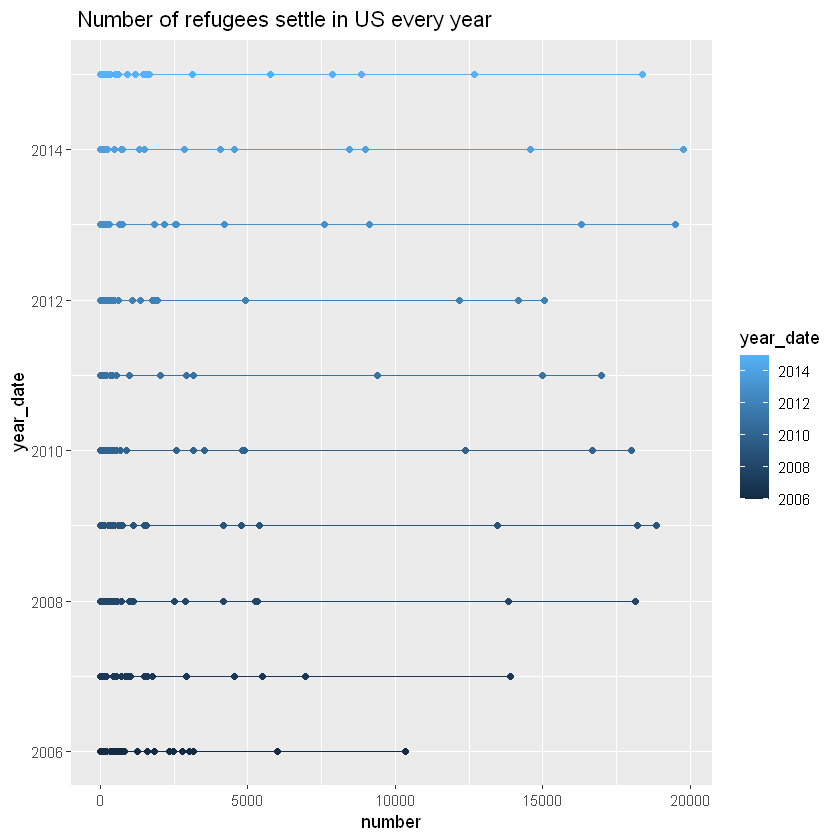

In [6]:
val <-refugees_clean
 
# Basic Line
ggplot(data=val, aes(x=year_date, y=number, group=year_date, colour=year_date)) +
  geom_line()+
  geom_point()+ ggtitle(" Number of refugees settle in US every year ")+ coord_flip()

In [7]:
pdf(file = "C:/Users/wf8az/Downloads/MyPlot1.pdf",   # The directory you want to save the file in
    width = 10, # The width of the plot in inches
    height = 10) # The height of the plot in inches

# Step 2: Create the plot with R code
val <-refugees_clean
  
# Basic Line
ggplot(data=val, aes(x=year_date, y=number, group=year_date, colour=year_date)) +
  geom_line()+
  geom_point()+ ggtitle(" Number of refugees settle in US every year ")+ coord_flip()
# Step 3: Run dev.off() to create the file!
dev.off()

Warning message:
"Removed 3 row(s) containing missing values (geom_path)."Warning message:
"Removed 109 rows containing missing values (geom_point)."

png 
  2

In [8]:
refugees_countries_cumulative <- refugees_clean %>%
  arrange(year_date) %>%
  group_by(origin_country) %>%
  mutate(cumulative_total = cumsum(number))

In [9]:
head(refugees_countries_cumulative)

origin_country,iso3,origin_region,origin_continent,year,number,year_date,cumulative_total
Afghanistan,AFG,South Asia,Asia,2006,651,2006-01-01,651
Angola,AGO,Sub-Saharan Africa,Africa,2006,13,2006-01-01,13
Armenia,ARM,Europe & Central Asia,Asia,2006,87,2006-01-01,87
Azerbaijan,AZE,Europe & Central Asia,Asia,2006,77,2006-01-01,77
Belarus,BLR,Europe & Central Asia,Europe,2006,350,2006-01-01,350
Bhutan,BTN,South Asia,Asia,2006,3,2006-01-01,3


Warning message:
"Removed 4 row(s) containing missing values (geom_path)."Warning message:
"Removed 109 rows containing missing values (geom_point)."

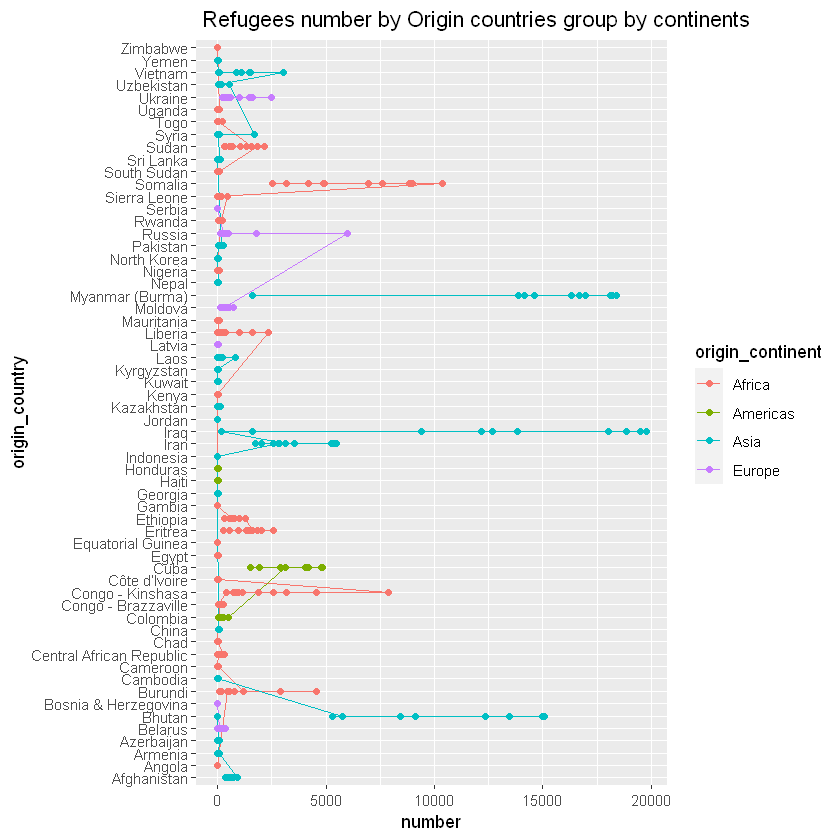

In [10]:
refugees_countries_cumulative %>% group_by(year) %>% arrange(desc(cumulative_total)) %>% slice(1:5) -> data
  
# Basic Line
ggplot(data=val, aes(x=origin_country, y=number, group=origin_continent,colour=origin_continent)) +
  geom_line()+
  geom_point()+ggtitle(" Refugees number by Origin countries group by continents ")+
coord_flip()

In [11]:
pdf(file = "C:/Users/wf8az/Downloads/MyPlot2.pdf",   # The directory you want to save the file in
    width = 10, # The width of the plot in inches
    height = 10) # The height of the plot in inches

# Step 2: Create the plot with R code
refugees_countries_cumulative %>% group_by(year) %>% arrange(desc(cumulative_total)) %>% slice(1:5) -> data

#val <-refugees_countries_cumulative
  
# Basic Line
ggplot(data=val, aes(x=origin_country, y=number, group=origin_continent,colour=origin_continent)) +
  geom_line()+
  geom_point()+ggtitle(" Refugees number by Origin countries group by continents ")+
coord_flip()

# Step 3: Run dev.off() to create the file!
dev.off()

Warning message:
"Removed 4 row(s) containing missing values (geom_path)."Warning message:
"Removed 109 rows containing missing values (geom_point)."

png 
  2

In [12]:
refugees_continents <- refugees_clean %>%
  group_by(origin_continent, year_date) %>%
  summarize(total = sum(number, na.rm = TRUE))

In [13]:
head(refugees_continents)

origin_continent,year_date,total
Africa,2006-01-01,18116
Africa,2007-01-01,17473
Africa,2008-01-01,8931
Africa,2009-01-01,9664
Africa,2010-01-01,13303
Africa,2011-01-01,7677


In [14]:
refugees_continents_cumulative <- refugees_clean %>%
  group_by(origin_continent, year_date) %>%
  summarize(total = sum(number, na.rm = TRUE)) %>%
  arrange(year_date) %>%
  group_by(origin_continent) %>%
  mutate(cumulative_total = cumsum(total))

In [15]:
head(refugees_continents_cumulative)

origin_continent,year_date,total,cumulative_total
Africa,2006-01-01,18116,18116
Americas,2006-01-01,3258,3258
Asia,2006-01-01,10076,10076
Europe,2006-01-01,9605,9605
Africa,2007-01-01,17473,35589
Americas,2007-01-01,2976,6234


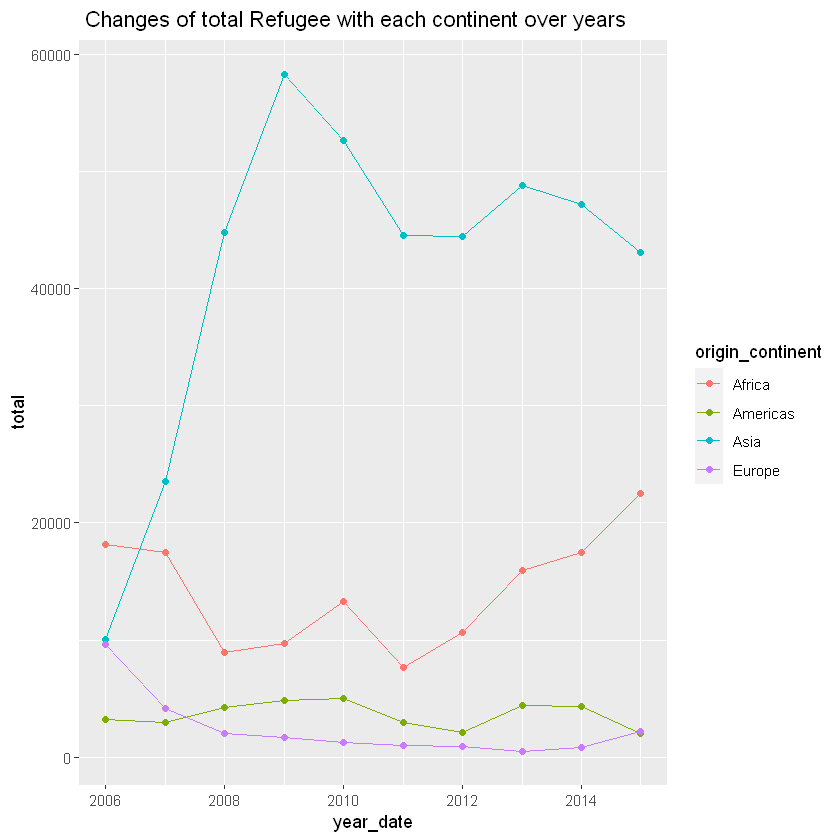

In [17]:
val <-refugees_continents_cumulative
  
# Basic Line
ggplot(data=val, aes(x=year_date, y=total, group=origin_continent,colour=origin_continent)) +
  geom_line()+
  geom_point()+ ggtitle(" Changes of total Refugee with each continent over years ")

In [18]:
pdf(file = "C:/Users/wf8az/Downloads/MyPlot3.pdf",   # The directory you want to save the file in
    width = 10, # The width of the plot in inches
    height = 10) # The height of the plot in inches

# Step 2: Create the plot with R code
val <-refugees_continents_cumulative
  
# Basic Line
ggplot(data=val, aes(x=year_date, y=total, group=origin_continent,colour=origin_continent)) +
  geom_line()+
  geom_point()+ ggtitle(" Changes of total Refugee with each continent over years ")

# Step 3: Run dev.off() to create the file!
dev.off()

png 
  2

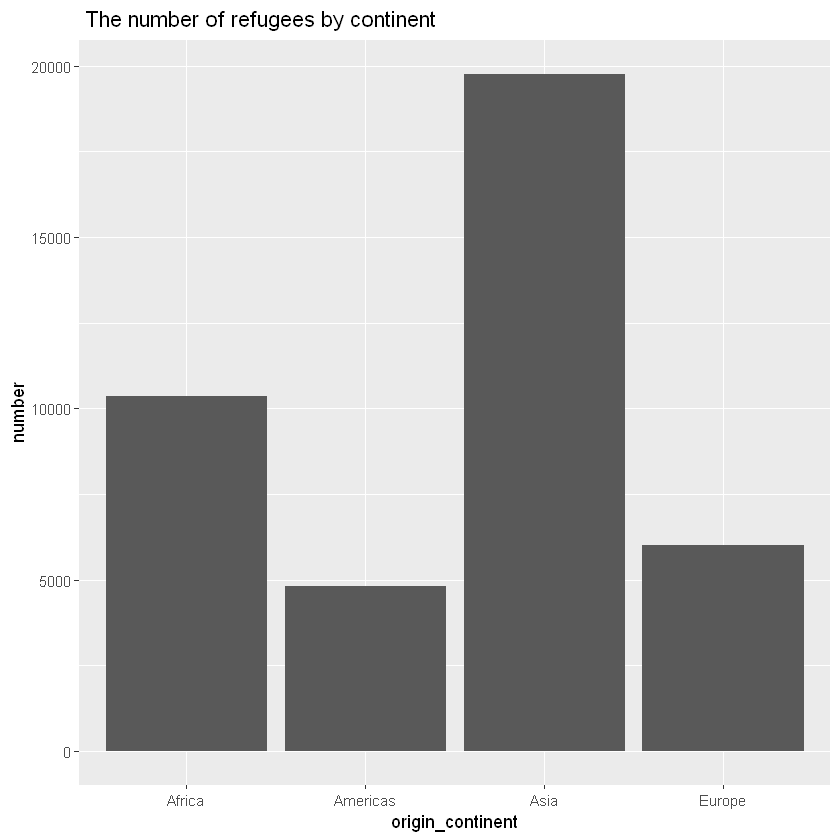

In [19]:
refugees_countries_cumulative %>% group_by(year_date) %>% arrange(desc(cumulative_total)) %>% slice(1:6) -> data
ggplot(data, aes(x=origin_continent, y=number)) + geom_bar(stat = "identity", position = "dodge") + ggtitle(" The number of refugees by continent")

In [20]:
pdf(file = "C:/Users/wf8az/Downloads/MyPlot4.pdf",   # The directory you want to save the file in
    width = 10, # The width of the plot in inches
    height = 10) # The height of the plot in inches

# Step 2: Create the plot with R code
refugees_countries_cumulative %>% group_by(year_date) %>% arrange(desc(cumulative_total)) %>% slice(1:6) -> data
ggplot(data, aes(x=origin_continent, y=number)) + geom_bar(stat = "identity", position = "dodge") + ggtitle(" The number of refugees by continent")

# Step 3: Run dev.off() to create the file!
dev.off()

png 
  2

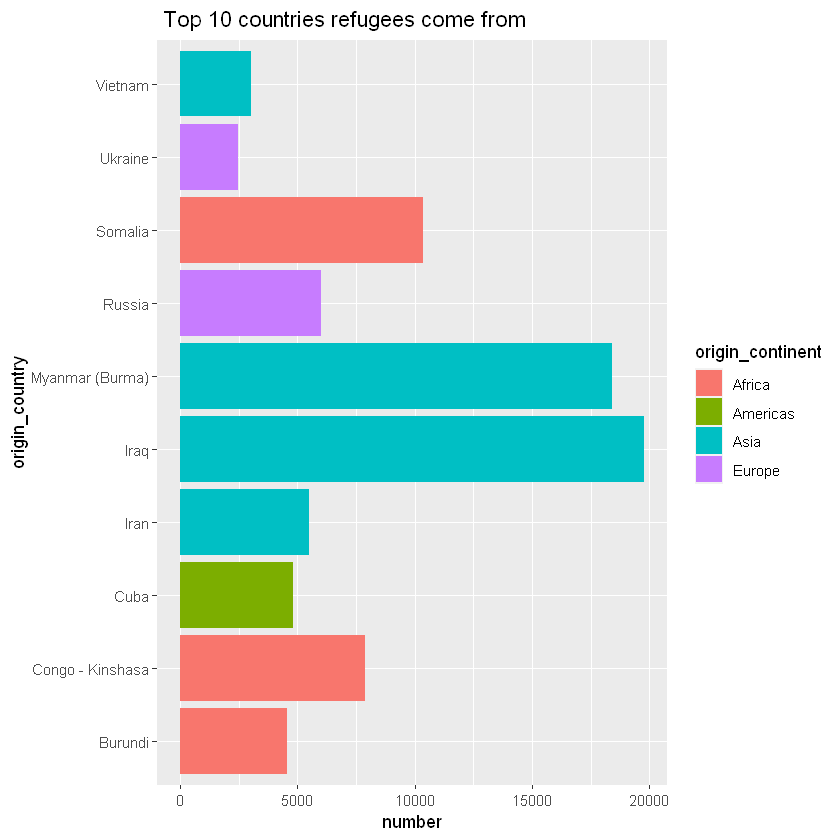

In [27]:
refugees_countries_cumulative %>% group_by(year_date) %>% arrange(desc(cumulative_total)) %>% slice(1:6) -> data
ggplot(data, aes(x=origin_country, y=number, fill=origin_continent)) + geom_bar(stat = "identity", position = "dodge") + ggtitle(" Top 10 countries refugees come from")+
coord_flip()

In [28]:
pdf(file = "C:/Users/wf8az/Downloads/MyPlot5.pdf",   # The directory you want to save the file in
    width = 10, # The width of the plot in inches
    height = 10) # The height of the plot in inches

# Step 2: Create the plot with R code
refugees_countries_cumulative %>% group_by(year_date) %>% arrange(desc(cumulative_total)) %>% slice(1:6) -> data
ggplot(data, aes(x=origin_country, y=number, fill=origin_continent)) + geom_bar(stat = "identity", position = "dodge") + ggtitle(" Top 10 countries refugees come from")+
coord_flip()
# Step 3: Run dev.off() to create the file!
dev.off()

png 
  2

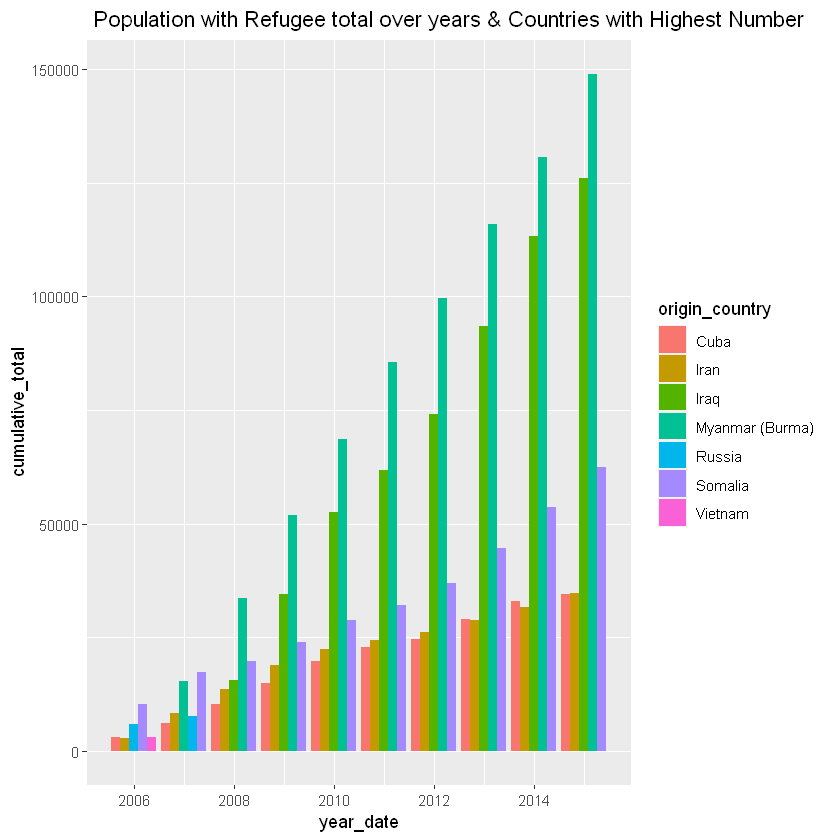

In [23]:
refugees_countries_cumulative %>% group_by(year_date) %>% arrange(desc(cumulative_total)) %>% slice(1:5) -> data
ggplot(data, aes(x=year_date, y=cumulative_total, fill=origin_country)) + geom_bar(stat = "identity", position = "dodge") + ggtitle(" Population with Refugee total over years & Countries with Highest Number")

In [24]:
pdf(file = "C:/Users/wf8az/Downloads/MyPlot6.pdf",   # The directory you want to save the file in
    width = 10, # The width of the plot in inches
    height = 10) # The height of the plot in inches

# Step 2: Create the plot with R code
refugees_countries_cumulative %>% group_by(year_date) %>% arrange(desc(cumulative_total)) %>% slice(1:5) -> data
ggplot(data, aes(x=year_date, y=cumulative_total, fill=origin_country)) + geom_bar(stat = "identity", position = "dodge") + ggtitle(" Population with Refugee total over years & Countries with Highest Number")
# Step 3: Run dev.off() to create the file!
dev.off()

png 
  2

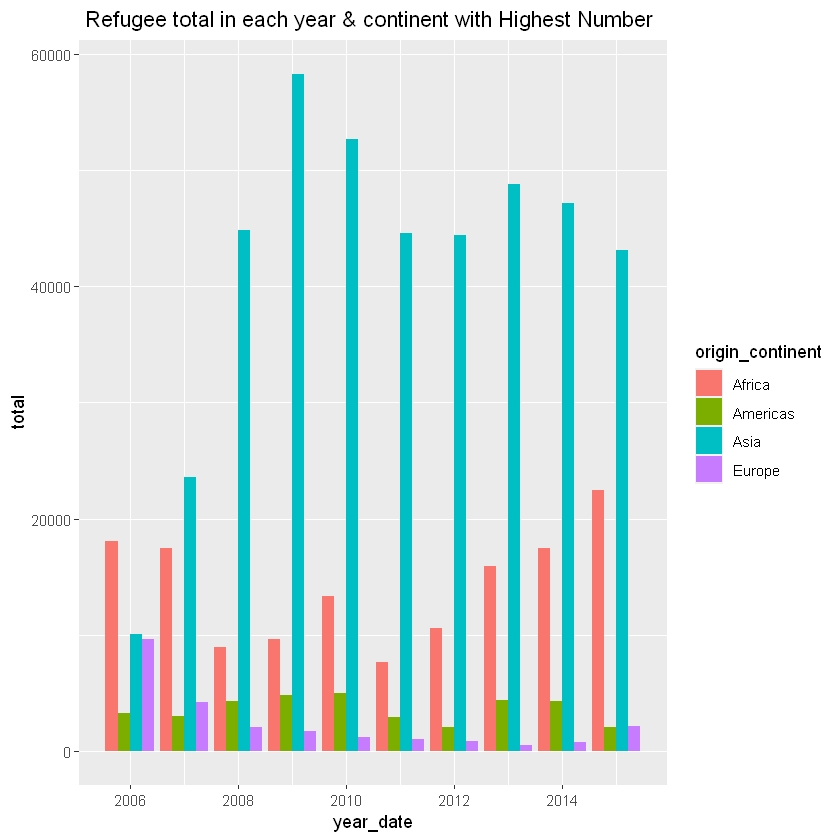

In [25]:
refugees_continents_cumulative %>% group_by(year_date) %>% arrange(desc(total)) %>% slice(1:5) -> data
ggplot(data, aes(x=year_date, y=total, fill=origin_continent)) + geom_bar(stat = "identity", position = "dodge") + ggtitle(" Refugee total in each year & continent with Highest Number")

In [26]:
pdf(file = "C:/Users/wf8az/Downloads/MyPlot7.pdf",   # The directory you want to save the file in
    width = 10, # The width of the plot in inches
    height = 10) # The height of the plot in inches

# Step 2: Create the plot with R code
refugees_continents_cumulative %>% group_by(year_date) %>% arrange(desc(total)) %>% slice(1:5) -> data
ggplot(data, aes(x=year_date, y=total, fill=origin_continent)) + geom_bar(stat = "identity", position = "dodge") + ggtitle(" Refugee total in each year & continent with Highest Number")# Step 3: Run dev.off() to create the file!
dev.off()

png 
  2